## Лабораторная работа 2
### Многослойные сети. Алгоритм обратного распространения ошибки.
#### Тимофеев А.В., М8О-407Б-19
##### Целью работы является исследование свойств многослойной нейронной сети прямого распространения и алгоритмов ее обучения, применение сети в задачах классификации и аппроксимации функции.
##### Вариант 12

In [15]:
import os
import keras
import tensorflow as tf
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import pylab

### Задание №1

In [16]:
# Уравнение эллипса в параметрическом виде.
def ellipse(t, a, b, x0, y0):
    x = x0 + a * np.cos(t)
    y = y0 + b * np.sin(t)
    return x, y

# Функция вращения фигуры на заданный угол.
def rotate(x, y, alpha):
    xr = x * np.cos(alpha) - y * np.sin(alpha)
    yr = x * np.sin(alpha) + y * np.cos(alpha)
    return xr, yr

In [17]:
# Эллипс
a1 = 0.2 
b1 = 0.2
alpha1 = np.pi/3
x01 = 0
y01 = 0.4

# Эллипс
a2 = 0.7
b2 = 0.5
alpha2 = -np.pi/3
x02 = 0.2
y02 = 0.18

# Эллипс
a3 = 1
b3 = 1
alpha3 = 0
x03 = 0
y03 = 0


t = np.arange(0, 2 * np.pi, 0.025)

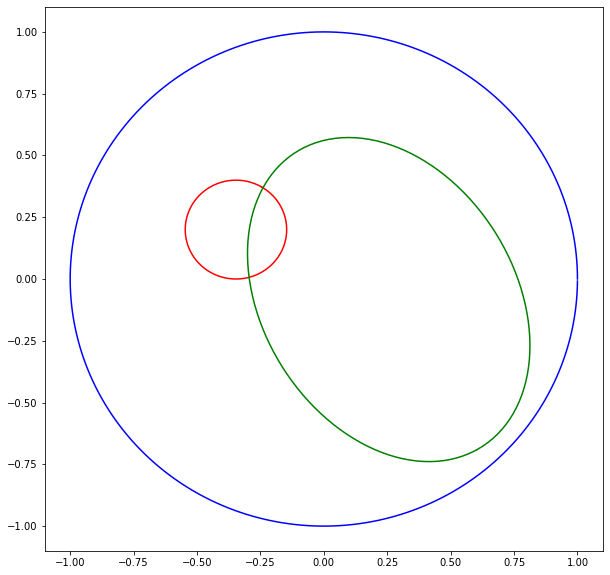

In [18]:
fig1x, fig1y = ellipse(t, a1, b1, x01, y01)
fig1x, fig1y = rotate(fig1x, fig1y, alpha1)

fig2x, fig2y = ellipse(t, a2, b2, x02, y02)
fig2x, fig2y = rotate(fig2x, fig2y, alpha2)

fig3x, fig3y = ellipse(t, a3, b3, x03, y03)
fig3x, fig3y = rotate(fig3x, fig3y, alpha3)

figure = plt.figure(figsize = (10, 10))

plt.plot(fig1x, fig1y, c = 'r')
plt.plot(fig2x, fig2y, c = 'g')
plt.plot(fig3x, fig3y, c = 'b')
plt.show()

In [19]:
datax = np.concatenate((fig1x, fig2x, fig3x), axis=0)
datay = np.concatenate((fig1y, fig2y, fig3y), axis=0)


data = np.array([datax, datay])

l1 = [[1, 0, 0] for _ in range(len(fig1x))]
l2 = [[0, 1, 0] for _ in range(len(fig2x))]
l3 = [[0, 0, 1] for _ in range(len(fig3x))]

labels = np.array(l1 + l2 + l3)

data = data.transpose()

In [20]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 10,shuffle = True)

In [21]:
model = keras.models.Sequential()

model.add(Dense(10, input_dim = 2, kernel_initializer=keras.initializers.RandomNormal(stddev=0.01)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))

model.compile(tf.keras.optimizers.SGD(0.05), 'mse')

hist = model.fit(train, train_labels, batch_size = 1, epochs = 100)

Epoch 1/100
604/604 [==============================] - 2s 2ms/step - loss: 0.2140
Epoch 2/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1998
Epoch 3/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1943
Epoch 4/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1919
Epoch 5/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1865
Epoch 6/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1817
Epoch 7/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1751
Epoch 8/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1669
Epoch 9/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1579
Epoch 10/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1504
Epoch 11/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1445
Epoch 12/100
604/604 [==============================] - 1s 2ms/step - loss: 0.1419
Epoch 13/100


1250/1250 [==============================] - 2s 1ms/step


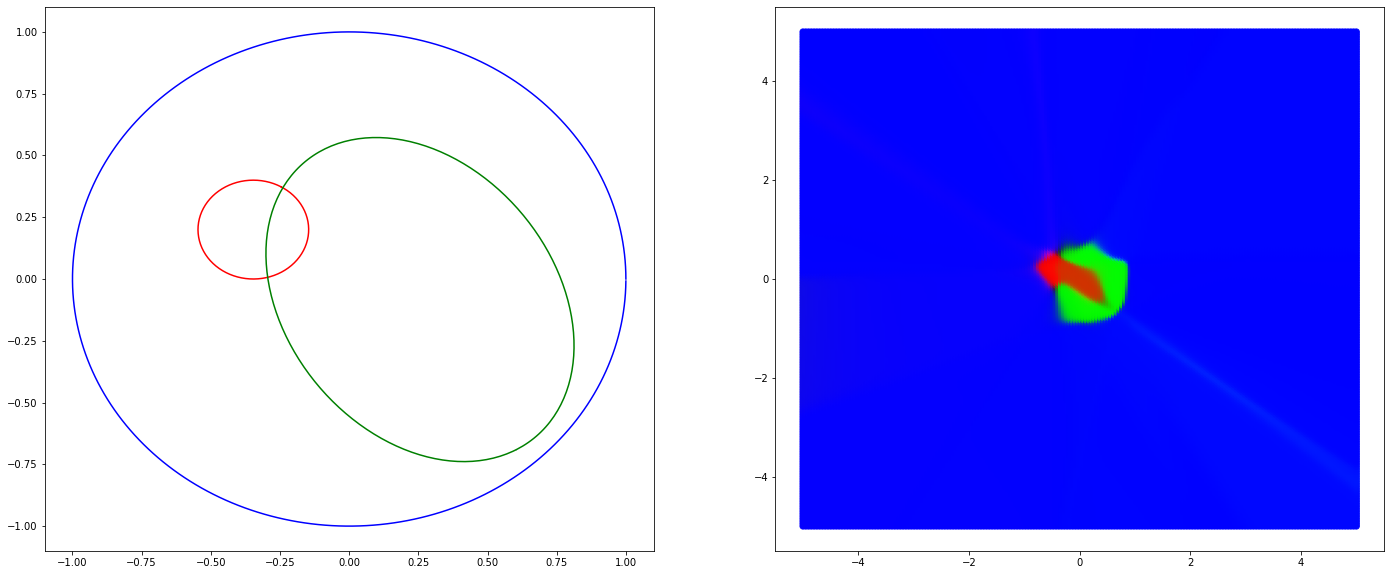

In [22]:
import itertools

x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)

figure = plt.figure(figsize = (24, 10))

ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)

ax1.plot(fig1x, fig1y, c = 'r')
ax1.plot(fig2x, fig2y, c = 'g')
ax1.plot(fig3x, fig3y, c = 'b')

data = np.array(list(itertools.product(x, y)))

xy = data.transpose()

pred = model.predict(data)


ax2.scatter(xy[0], xy[1], c = pred)

plt.show()

### Задание №2

In [23]:
def x(t):
    return np.cos(-(np.cos(t)) * t**2 + t)

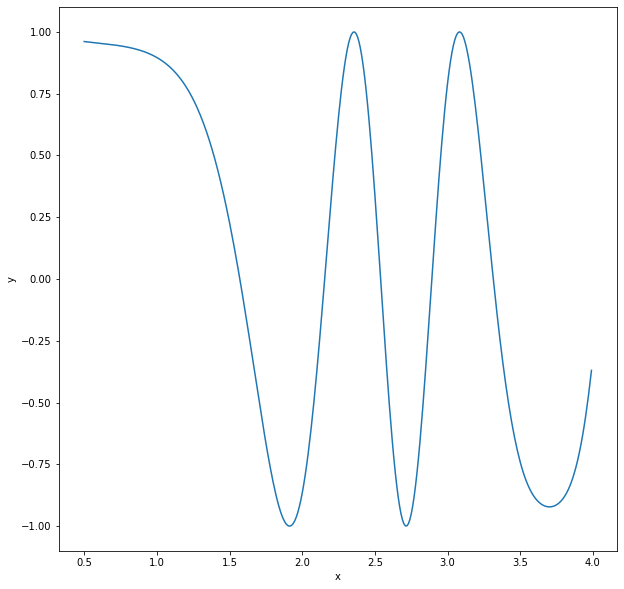

In [24]:
h = 0.01

train_x = np.arange(0.5, 4, h)
train_y = x(train_x)

figure = plt.figure(figsize = (10, 10))
plt.plot(train_x, train_y)
plt.ylabel("y")
plt.xlabel("x")
plt.show()

In [25]:
model = keras.models.Sequential()

model.add(Dense(20, input_dim = 1, activation = "tanh",  kernel_initializer = keras.initializers.RandomNormal(stddev = 0.01), bias_initializer = keras.initializers.Zeros()))
model.add(Dense(80, activation = "tanh"))
model.add(Dense(40, activation = "tanh"))
model.add(Dense(1, activation = "linear"))

model.compile(tf.keras.optimizers.SGD(0.01), 'mse')

hist = model.fit(train_x, train_y, batch_size = 1, epochs = 800, shuffle = True)

Epoch 1/800
350/350 [==============================] - 1s 2ms/step - loss: 0.4598
Epoch 2/800
350/350 [==============================] - 1s 2ms/step - loss: 0.4264
Epoch 3/800
350/350 [==============================] - 1s 2ms/step - loss: 0.4124
Epoch 4/800
350/350 [==============================] - 1s 2ms/step - loss: 0.3983
Epoch 5/800
350/350 [==============================] - 1s 3ms/step - loss: 0.3895
Epoch 6/800
350/350 [==============================] - 1s 3ms/step - loss: 0.3943
Epoch 7/800
350/350 [==============================] - 1s 2ms/step - loss: 0.3836
Epoch 8/800
350/350 [==============================] - 1s 2ms/step - loss: 0.3853
Epoch 9/800
350/350 [==============================] - 1s 2ms/step - loss: 0.3767
Epoch 10/800
350/350 [==============================] - 1s 2ms/step - loss: 0.3666
Epoch 11/800
350/350 [==============================] - 1s 2ms/step - loss: 0.3731
Epoch 12/800
350/350 [==============================] - 1s 2ms/step - loss: 0.3698
Epoch 13/800


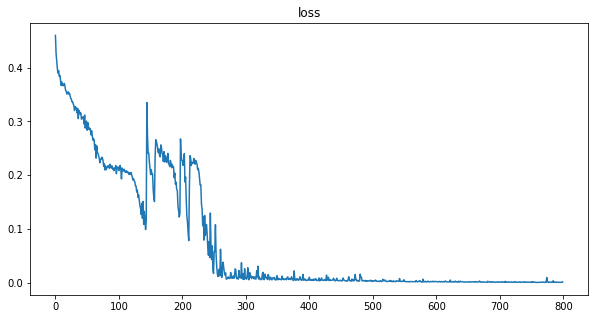

In [26]:
figure = plt.figure(figsize = (10, 5))
histx = []
for i in range(len(hist.history['loss'])):
    histx.append(i)


plt.plot(histx, hist.history['loss'])
plt.title("loss")
plt.show()

25/25 [==============================] - 0s 2ms/step


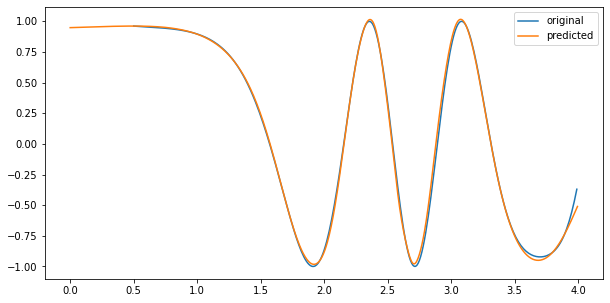

In [27]:
t2 = np.arange(0, 4.0, 0.005)

pred = model.predict(t2)

figure = plt.figure(figsize = (10, 5))


plt.plot(train_x, train_y, label = 'original')
plt.plot(t2, pred, label = 'predicted')
plt.legend()
plt.show()

#### Вывод

Выполнив данную лабораторную работу, я вспомнил, как устроены многослойные сети
также я реализовал многослойные нейронные сети для решения задач фильтрации и аппроксимации с помощью фреймворка TensorFlow

 
